# Observations and Insights 

1. There is a positive corelation between the weight of the mice and the tumor size.The P-Value of .84 indicates this relationship.
2. The use of Capomulin drug on mouse s710 indicates that it helps to reduce the size of the tumor.
3.The bar graph showed the Drug Regimen Capomulin has the maximum number and Propriva has the smallest mice number.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results, how='outer',on='Mouse ID')


# Display the data table for preview
df.head()
df.shape



(1893, 8)

In [12]:
# Checking the number of mice.
df['Mouse ID'].value_counts()



g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_df = df.set_index('Mouse ID')
index_df.loc['g989']


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])
clean_df.shape

(1880, 7)

In [15]:
# Checking the number of mice in the clean DataFrame.
clean_df1 = clean_df.reset_index()
clean_df1['Mouse ID'].value_counts()


k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = clean_df1.groupby(['Drug Regimen'])
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_median = tumor['Tumor Volume (mm3)'].median()
tumor_variance = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem =tumor['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({"Mean":tumor_mean,
                         "Median":tumor_median,
                         "Variance":tumor_variance,
                         "Standard Deviation":tumor_std,
                         "SEM":tumor_sem,})
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor = clean_df1.groupby(['Drug Regimen'])
tumor1 = tumor['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
tumor1


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

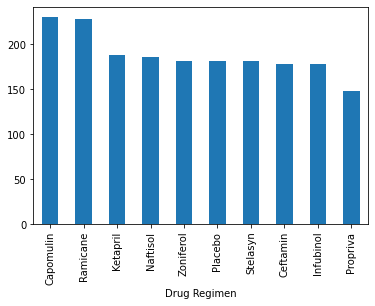

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
timepoint = tumor['Timepoint'].count()
timepoint.sort_values(ascending=False).plot.bar()
plt.show()


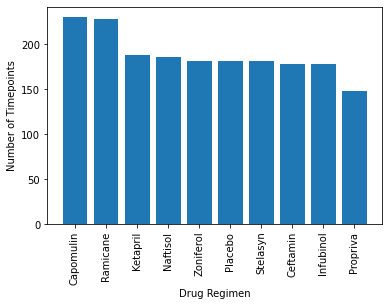

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
timepoint_desc =timepoint.sort_values(ascending=False)
plt.bar(timepoint_desc.index, timepoint_desc.values)
plt.ylabel('Number of Timepoints', size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()


<AxesSubplot:ylabel='Sex'>

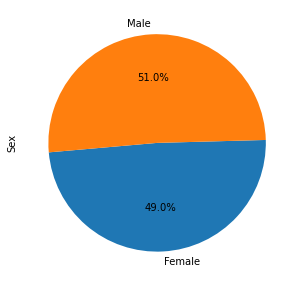

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = clean_df1.groupby(['Sex'])['Sex'].count()
sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5,5))



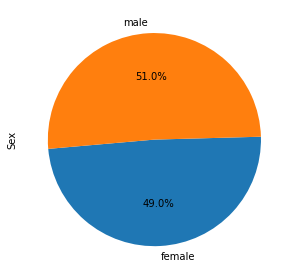

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('female','male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()





## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tm = clean_df1.groupby(['Mouse ID'])['Timepoint'].max()
last_tm_df = pd.DataFrame(last_tm)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = pd.merge(clean_df1, last_tm_df, on=('Mouse ID','Timepoint'),how='right')
last_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
        
    
    # add subset 
drug_df = pd.DataFrame({"Capomulin":tumor_cap,
                        treatments[1]:tumor_ram,
                        treatments[2]:tumor_inf,
                        treatments[3]:tumor_cef
})
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
drug_df
    

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [34]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quart_cap = drug_df[treatments[0]].quantile([.25, .5 , .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = drug_df[treatments[0]].max()
min_cap = drug_df[treatments[0]].min()


quart_ram = drug_df[treatments[1]].quantile([.25, .5 , .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = drug_df[treatments[1]].max()
min_ram = drug_df[treatments[1]].min()


quart_inf = drug_df[treatments[2]].quantile([.25, .5 , .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = drug_df[treatments[2]].max()
min_inf = drug_df[treatments[2]].min()


quart_cef = drug_df[treatments[3]].quantile([.25, .5 , .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = drug_df[treatments[3]].max()
min_cef = drug_df[treatments[3]].min()

outliers = pd.DataFrame({'Drug':treatments,
                         'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                         'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Median':[med_cap, med_ram, med_inf, med_cef],
                         'Upper Bound':[upb_cap, upb_ram, upb_inf, upb_cef],
                         'Lower Bound':[lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                         'Max':[max_cap, max_ram, max_inf, max_cef],
                         'Min':[min_cap, min_ram, min_inf, min_cef],
})
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


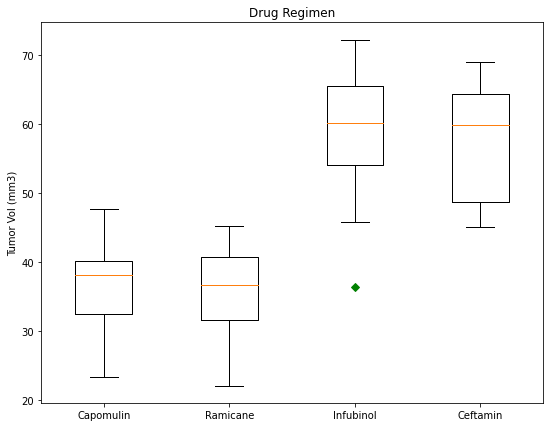

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = [drug_df[treatments[0]], drug_df[treatments[1]], drug_df[treatments[2]], drug_df[treatments[3]]]
fig1 , ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor Volume by Drug Regimen')
ax.set_title('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments)
plt.savefig('boxplot')
plt.show()                                                                      
                                                                       
                                                                       

## Line and Scatter Plots

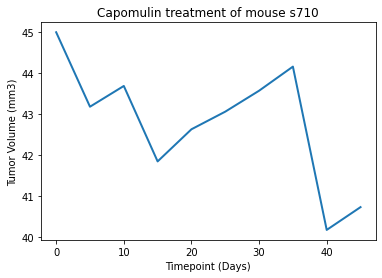

In [42]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = clean_df1.loc[clean_df1["Mouse ID"] == "s710" ,:]
line_df
x_axisTP = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]
plt.title('Capomulin treatment of mouse s710')
plt.plot(x_axisTP, tumsiz, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()



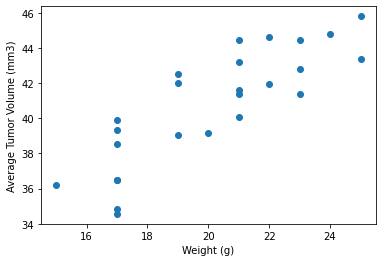

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg[ 'Weight (g)'], capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()
capavg

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and avaerage tumor volume is {corr}")



The correlation between mouse weight and avaerage tumor volume is 0.84


In [46]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

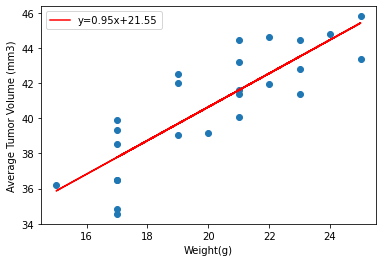

In [52]:
slope = 0.9544396890241048
intercept = 21.552160532685008
line = slope*(capavg['Weight (g)'])+intercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])             
plt.plot(capavg['Weight (g)'], line,'r',label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.savefig('linearregression')
plt.show()

                